# Chapter 2. End-to-End Machine Learning Project

## Look at the Big Picture
### Frame the probelm
* **Knowing the objective is important becuase it will determine how you frame the problem, which algorithm you will select, which performance measure you will use to evaluate your model, and how much effor you will spend tweaking it**
Pipelines
1. **A sequence of data processing components is called a pipeline**
1. **Components typically run asyncronously. Each compoenent pulls in large amount of data, processes it, ans spits it out in another data store**
1. **Sometimes later, the next component in the pipeline pulls this data and spits out its own ourput**
1. **The current situation will often give you a reference for performance, as well as insights on how to solve the problem**
1. **Frame the problem**

### Select a Performance Measure
**Root Mean Square Error(RMSE):**<br>
**Gives an idea of how much error the system typically makes in its predictions, with a higher weight for large errors**
* **X(j) is a vector of all the feature values(excluding the label) of the jth instance in the datasete, and y(i) is its lable(the desired value for the instance)**
* ***h* is your system's prediction function, also called hypothesis**
* **RMSE(X,h) is the cost function measure on the set of examples using your hypothesis**
**Distance Measures:**<br>
* ***Euclidean norm* *l2* norm, ||.||2**
* ***Mahattan norm*  measures the distance between two points in a city if you travel along orthogonal city block ||.||1 / *l1* norm**
* ***lk* norm of a vector v containing n elements is defined as ||v||k gives the number of nonzero elements in the vector**
* **The higher the norm index, the more it fouceses on large values and neglects small ones.**
* **The RMSE is more sensitive to outliers than the MAE**<br>

### Check the Assumptions
**Fetching data: Creates datasets/housing directory in your workspace, downloads the housing.tgz file, and extracts the housing.csv file from it in this directory**

In [3]:
import os
import tarfile
import urllib

In [4]:
DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml2/master/" 
HOUSING_PATH=os.path.join("datasets",'housing')

In [6]:
HOUSING_URL=DOWNLOAD_ROOT+"datasets/housing/housing.tgz" 

In [8]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

**Returns a pandas DataFrame object containing all th data**

In [9]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [10]:
fetch_housing_data()

In [11]:
housing=load_housing_data()

In [12]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

**The** info( ) **method is useful to get a quick description of the data, in particular the total number of rows, each attribute's type, and the total number of nonnull values**

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**You can find our what categories exist by using the value_counts( ) method**

In [14]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

describe( ) **method shows a summary of the numerical attributes**

In [15]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [16]:
import matplotlib.pyplot as plt

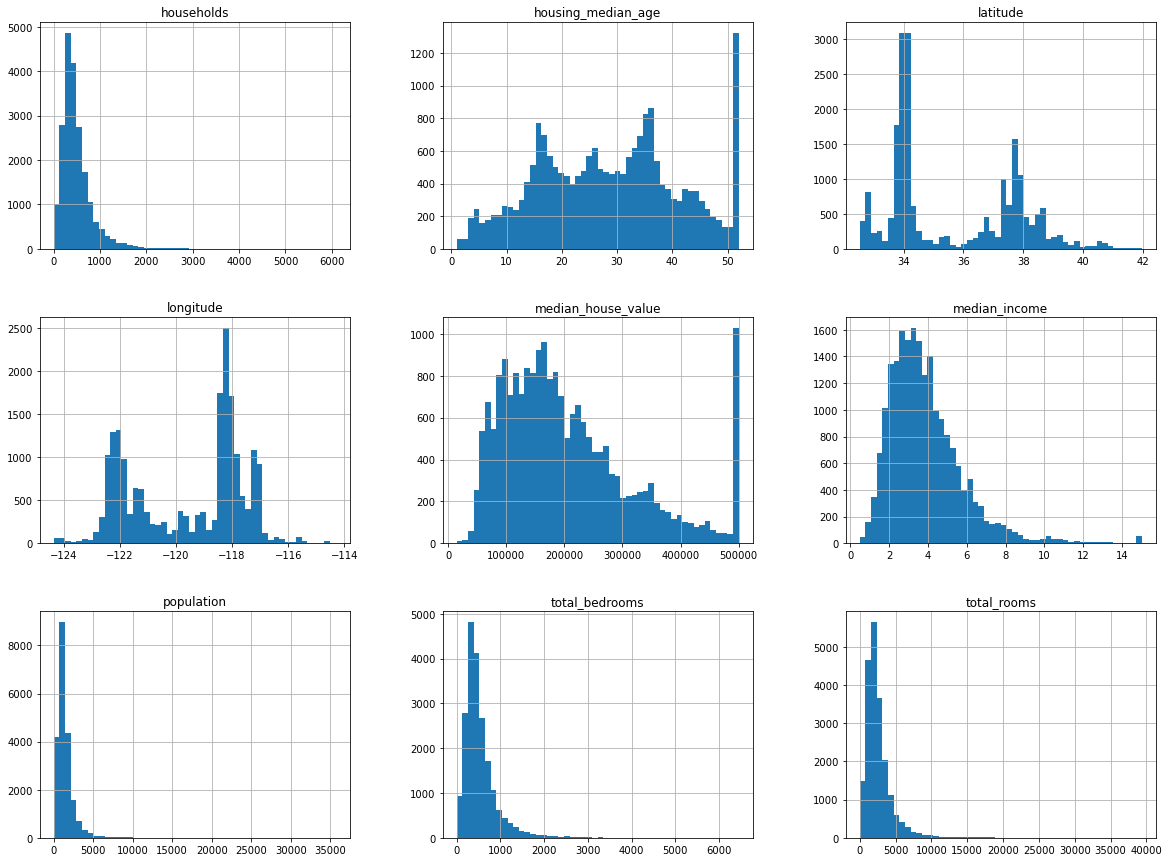

In [18]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

**Many histograms are *tail-heavy*: they extend much farther to the right of the median than to the left**

#### Create a Test Set
* **Data snooping bias: If You estimate the generalization error using the test set, you will lauch a system that will not perform as well as expected**
* **Creating a test set: Pick some instances randomly, typically 20% of the dataset, and then set them aside**

In [19]:
import numpy as np

In [23]:
def split_train_test(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [24]:
train_set,test_set=split_train_test(housing,0.2)

In [25]:
len(train_set)

16512

In [26]:
len(test_set)

4128

**Compute a has of each instance's identifier and put that instance in the test set if the has is lower than or eauql to 20% of the maximum hash value.**<br>
**This ensures that the test set will remain consistent across multiple runs**

In [28]:
from zlib import crc32

In [29]:
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier))&0xfffffffff<test_ratio*2*32

In [32]:
def split_train_test_by_id(data,test_ratio,id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[-in_test_set],data.loc[in_test_set]

In [33]:
housing_with_id=housing.reset_index()#adds an 'index' column
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,"index")

**Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways**<br>
* **train_test_split( )**
* **There is a** random_state **parameter that allows you to set the random generator seed**
* **You can multiple datasets with an identical number of rows, and will split them on the same indices**

In [35]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

***stratified sampling*: the population is divided into homogenous subgroups called strata, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the whole population** 

In [39]:
housing["income_cat"]=pd.cut(housing["median_income"],
                            bins=[0.,1.5,3.0,4.5,6.,np.inf],
                            labels=[1,2,3,4,5])

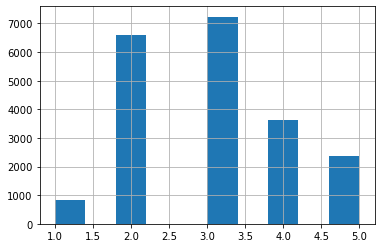

In [42]:
housing["income_cat"].hist()
plt.show()

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

In [46]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [48]:
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [51]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

**Drop the** income_cat **attribute**

In [52]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

## Discover and Visualise the Data to Gain Insights
**Make sure you have put the test set aside and you are only exploring the training set**

In [53]:
housing=strat_train_set.copy()

### Visulizing Geographical Data

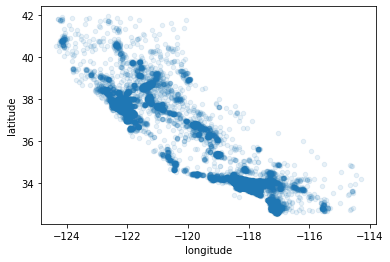

In [57]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)
plt.show()

**The radius of each circle represents the district's population(option s), and the color represents the price(oprion c). A predefined color map(option cmap) called jet, which ranges from blue(low values) to red(high prices)**

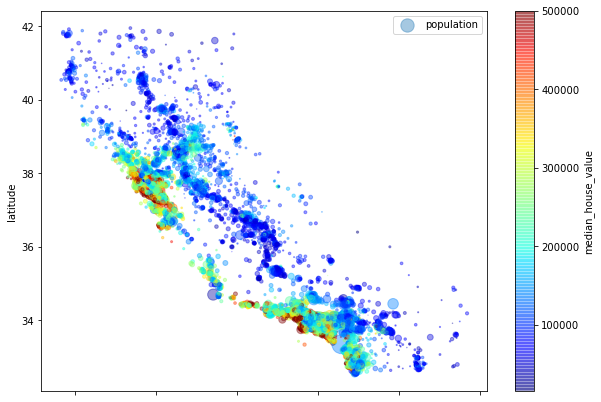

In [64]:
housing.plot(kind="scatter",x='longitude',y='latitude',alpha=0.4,
            s=housing["population"]/100,label="population",figsize=(10,7),
            c='median_house_value',cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()
plt.show()

### Looking for Correlations
**Pearson's: standard correlation coefficient between every pair of attributes using the** corr **method**

In [65]:
corr_matrix=housing.corr()

In [66]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

**The correlation coefficient only measires linear correlations,may completely miss out on nonlinear relationships**<br>
pandas.plotting.scattermatrix **attribute:plots every numerical attribute against other numerical attribute**

In [67]:
from pandas.plotting import scatter_matrix

In [68]:
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]

**The diagonal displays a histogram of each attribute**

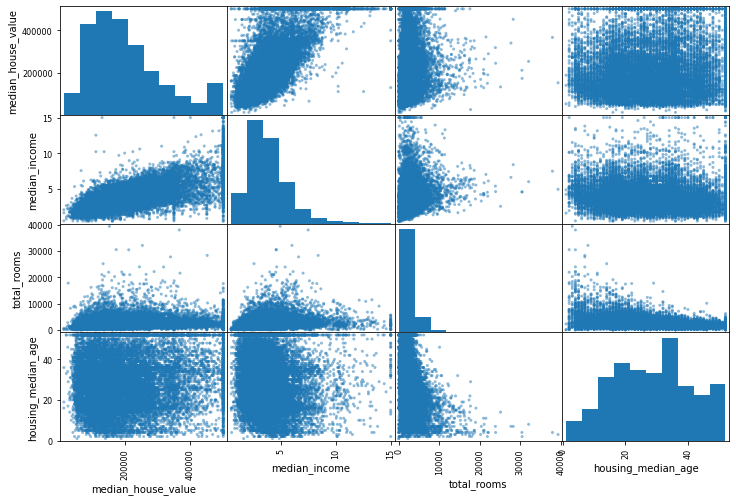

In [71]:
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

**Plot a scatter plot of median income versus the median house value**

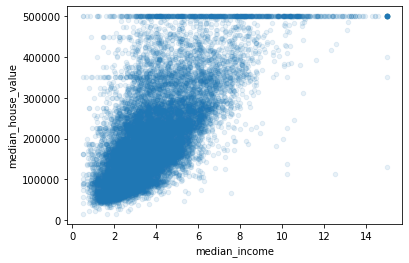

In [73]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)
plt.show()

### Experimenting with Attribute Combinations

In [74]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]

In [75]:
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]

In [76]:
housing["population_per_household"]=housing["population"]/housing["households"]

In [77]:
corr_matrix=housing.corr()

In [79]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### Prepare the Data for Machine Learning Algorithms
**Write functions for this purpose**
* **Reproduce these transformations easily on any dataset**
* **Gradually build a library of transformation functions that can reuse in future projects**
* **Use these functions in your live system to transform the new data before feeding it to algorithm**
* **Make it possible to easily try various transformations**

drop **creates a copy of the data and does not affect the** strat_train_set

In [81]:
housing=strat_train_set.drop("median_house_value",axis=1)

In [82]:
housing_labels=strat_train_set["median_house_value"].copy()

#### Data Cleaning
1. **Get rid of te corresponding districts**
1. **Get rid of the whole attribute**
1. **Set the valuesd to some value(zero, the mean,the median)**

**Using DataFrame's** dropna( ), drop( ), **and** fillna( ) **methods**

In [83]:
housing.dropna(subset=["total_bedrooms"])

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
18632       306.0       113.0         6.4214       <1H OCEAN  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN  
...           ...         ...            ...             ...  
6563        573.0       210.0         4.9312          INLAND  
12053      1052.0       258.0         2.0682          INLAND  
13908      2098.0       765.0         3.2723          INLAND  
11159      1356.0       356.0         4.0625       <1H OCEAN  
15775      1269.0       639.0         3.5750        NEAR BAY  

[16354 rows x 9 columns]

In [84]:
housing.drop("total_bedrooms",axis=1)

longitude  latitude  housing_median_age  total_rooms  population  \
17606    -121.89     37.29                38.0       1568.0       710.0   
18632    -121.93     37.05                14.0        679.0       306.0   
14650    -117.20     32.77                31.0       1952.0       936.0   
3230     -119.61     36.31                25.0       1847.0      1460.0   
3555     -118.59     34.23                17.0       6592.0      4459.0   
...          ...       ...                 ...          ...         ...   
6563     -118.13     34.20                46.0       1271.0       573.0   
12053    -117.56     33.88                40.0       1196.0      1052.0   
13908    -116.40     34.09                 9.0       4855.0      2098.0   
11159    -118.01     33.82                31.0       1960.0      1356.0   
15775    -122.45     37.77                52.0       3095.0      1269.0   

       households  median_income ocean_proximity  
17606       339.0         2.7042       <1H OCEAN  
18632       113.0         6.4214       <1H OCEAN  
14650       462.0         2.8621      NEAR OCEAN  
3230        353.0         1.8839          INLAND  
3555       1463.0         3.0347       <1H OCEAN  
...           ...            ...             ...  
6563        210.0         4.9312          INLAND  
12053       258.0         2.0682          INLAND  
13908       765.0         3.2723          INLAND  
11159       356.0         4.0625       <1H OCEAN  
15775       639.0         3.5750        NEAR BAY  

[16512 rows x 8 columns]

In [87]:
median=housing["total_bedrooms"].median()#option3

In [86]:
housing["total_bedrooms"].fillna(median,inplace=True)

**Scikit-Learn proccides a class** SimpleImputer **to take care of missing values**<br>
1. **Create a** SimpleImputer **instance, specifying that you want to replace each attribute's missing values with the median of that attribute**

In [88]:
from sklearn.impute import SimpleImputer

In [89]:
imputer=SimpleImputer(strategy="median")

**Since the median can only be computed on numerical attributes, you need to create a copy of the data without the text attribute** ocean_proximity

In [90]:
housing_num=housing.drop("ocean_proximity",axis=1)

**The** imputer **has simply computed the median of each attribute and stored the result in its** statistics_ **instance variable**

In [91]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [92]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

**You can use this "trained"** imputer **to transform the trainning set by replacing missing values with the learned medians**

In [93]:
X=imputer.transform(housing_num)

**Put the numpy array back into a DataFrame**

In [94]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,
                       index=housing_num.index)

## SCIKIT-LEARN DESIGN
**Consistency:All objects share a consistent and simple interface**<br>
**Estimators**<br>
1. **Any object that can estimate some parameters based on a dataset is called an *estimator***
1. **The estimation itself is performed by the** fit( ) **method, and it tkaed only a dataset as a parameter**
1. **Any other parameter needed to guide the estimation process is considered a hyperparameter, and it must be set as an instance variable**

**Transformers:**<br>
1. **Some estimators can also transform a dataset, called *transformers***
1. **The transformation is performed by the** transform( ) **method with the dataset to transform as a parameter. It returns the transformed dataset.** 
1. **The transformation generally relies on the learned parameters, as is the case of an** imputer
1. **All transformers also have a convinience method called** fit_transform( ) **that is equivalent to calling** fit( ) **and then** transform( )

**Predictors:**<br>
1. **Some estimators, given a dataset, are cample of making predictions, they are called *predictors***
1. **A predictor has a** predict( ) **method taht takes a dataset of new instances and returnss a dataset of corresponding predictions**
1. **It also has a** score **method that measures the quality of predictions, given a test set**

**Inspection**<br>
1. **All the estimator's hyperparameters are accessible directly via public instance variables and all the estimator's learned parameters are accessible via public instance variables with an underscore suffix**

**Nonproliferation of classes**<br>
1. **Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes**
1. **Hyperparameters are just regular Python strings or numbers**

**Composition**<br>
1. **Existing building blocks are reused as much as possible**

**Sensible defaults**
1. **Scikit-Learn provided reasonbale default values for most parameters, making it easy to quickly create a baseline working system**

### Handling Text and Categorical Attributes

In [95]:
housing_cat=housing[["ocean_proximity"]]

In [97]:
housing_cat.head(10)

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN

**Convert these categories from text to numbers**

**ML algorithm will assume the two nearby values are more similar than two distant values**

In [98]:
from sklearn.preprocessing import OrdinalEncoder

In [99]:
ordinal_encoder=OrdinalEncoder()

In [100]:
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)

In [101]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

**Get the list of caregories using the** categories_ **instance variable**

In [102]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

***one-hot encoding* :Only one attribute will be equal to 1(hot), while the others will be 0(cold). The new attributes are sometimes called *dummy* attributes**

In [103]:
from sklearn.preprocessing import OneHotEncoder

In [104]:
cat_encoder=OneHotEncoder()

In [105]:
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

**Output is a SciPy *sparse matrix*: only stores the location os the nonzero elements**

In [107]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

**Convert to a NumPy array**

In [108]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

**Get the list of categories using the encoder's** categories_ **instance variable**

In [109]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers
**Create transformers to work seamlessly with Scikit-Learn functionalities**<br>
**Scikit-Learn relies on duck typing, all you need to do is create a class and implement three methods:** fit( )**returning** self, transform( ), **and** fit_transform( )

In [113]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Feature Scaling
***min-max scaling*:Values are shifted and rescaled so theyt end up ranging from 0 to 1. SK-Learn provides a transformer called** MinMaxScaler<br>
***Standardization*: first subtracts the mean value, and then it divides by the standard deviation so that the resulting distribution has unit variance. Sk-Learn provides a transformer called**StandardScaler

### Transformation Pipelines

1. **The** Pipeline **constructor takes a list of name/estimator pairs defining a sequence of steps. ALl but the last estimator must be transformers**<br>
1. **When calling the pipeline's** fit( ) **method, calls** fit_transform( ) **sequentially, passing the output of each call as the parameters to the next call until it reaches the final estimator**

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

columnTransformer **Works great with pandas DataFrames. Handle all the columns, applying the appropriate transformations to each column**

In [120]:
from sklearn.compose import ColumnTransformer

In [121]:
num_attribs=list(housing_num)

In [122]:
cat_attribs=["ocean_proximity"]

1. **Import the** ColumnTransformer **class**
1. **Get the list of numerical column names and the list of categorical column names**
1. **Construct a** ColumnTransformer
1. **The constructor requires a list of tuples, where each tuple contains a name, a transformer, and a list of names of columns that the transformer should be applied to**

In [123]:
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs),
])

In [124]:
housing_prepared=full_pipeline.fit_transform(housing)

## Select and Train a Model
### Training and Evaluating on the Training Set
**Train a linear regression model**

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
lin_reg=LinearRegression()

In [127]:
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [128]:
some_data=housing.iloc[:5]

In [129]:
some_labels=housing_labels.iloc[:5]

In [130]:
some_data_prepared=full_pipeline.transform(some_data)

In [131]:
print("Predictions:",lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [132]:
print("Labels: ",list(some_labels))

Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


**Calculate mean squared error**

In [135]:
from sklearn.metrics import mean_squared_error

In [136]:
housing_predictions=lin_reg.predict(housing_prepared)

In [138]:
lin_mse=mean_squared_error(housing_labels,housing_predictions)

In [139]:
lin_rmse=np.sqrt(lin_mse)

In [140]:
lin_rmse

68628.19819848922

**Fit the model in a** DecisionTreeRegressor

In [141]:
from sklearn.tree import DecisionTreeRegressor

In [142]:
tree_reg=DecisionTreeRegressor()

In [143]:
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

**Train the decision tree model on the training set**

In [144]:
housing_predictions=tree_reg.predict(housing_prepared)

In [147]:
tree_mse=mean_squared_error(housing_labels,housing_predictions)

In [148]:
tree_rmse=np.sqrt(tree_mse)

In [149]:
tree_rmse

0.0

### Better Evaluation Using Cross-Validartion

***k-fold-cross-validation*:randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and train on the other 9 folds**

In [150]:
from sklearn.model_selection import cross_val_score

In [151]:
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,
                      scoring="neg_mean_squared_error",cv=10)

**SK-Learn's cross-validation features expect a utility function(greater is better) rather than a cost function(lower is better), so the scoring function is actually the opposite of MSE**<br>
**Tree regression scores**

In [152]:
tree_rmse_scores=np.sqrt(-scores)

In [153]:
def display_scores(scores):
    print("scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation",scores.std())

In [154]:
display_scores(tree_rmse_scores)

scores:  [69577.50228522 65868.46004251 70841.68725986 69900.034056
 70808.64634875 73980.30835315 71656.60224448 70595.24998677
 78110.29012508 70830.89684902]
Mean:  71216.96775508374
Standard deviation 2986.956054863787


In [155]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,
                          scoring="neg_mean_squared_error",cv=10)

In [156]:
lin_rmse_scores=np.sqrt(-lin_scores)

In [157]:
display_scores(lin_rmse_scores)

scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard deviation 2731.6740017983457


**Random Forest**

In [158]:
from sklearn.ensemble import RandomForestRegressor

In [159]:
forest_reg=RandomForestRegressor()

In [160]:
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [161]:
forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,
                      scoring="neg_mean_squared_error",cv=10)

In [162]:
forest_rmse_scores=np.sqrt(-forest_scores)

In [163]:
display_scores(forest_rmse_scores)

scores:  [49422.11566943 47658.26979002 49751.36523176 52052.14942832
 49571.5886295  53245.35260104 48753.70393094 47906.28068352
 53157.47599565 50038.16005645]
Mean:  50155.646201662414
Standard deviation 1909.7749848470905


## Fine-Tune Your Model
### Grid Search
**SK-Learn's** GirdSearchCV: **Input which hyperparameter to experiment with and what values to try out, and it will use cross-validation to evaluate the possible combinations of hyperparameter values**

In [164]:
from sklearn.model_selection import GridSearchCV

In [169]:
param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

In [171]:
forest_reg=RandomForestRegressor()

In [170]:
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)

In [172]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [173]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

**Get the best estimator**

In [174]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

**Get the grid srarch evaluation scores**

In [176]:
cvres=grid_search.cv_results_

In [179]:
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64394.68999417801 {'max_features': 2, 'n_estimators': 3}
55886.4456291014 {'max_features': 2, 'n_estimators': 10}
52742.34287048966 {'max_features': 2, 'n_estimators': 30}
60507.864280336056 {'max_features': 4, 'n_estimators': 3}
53452.720495687514 {'max_features': 4, 'n_estimators': 10}
50656.51780384107 {'max_features': 4, 'n_estimators': 30}
59562.236823208106 {'max_features': 6, 'n_estimators': 3}
51558.53951654646 {'max_features': 6, 'n_estimators': 10}
50142.15759263055 {'max_features': 6, 'n_estimators': 30}
59160.25090135236 {'max_features': 8, 'n_estimators': 3}
52469.13814993522 {'max_features': 8, 'n_estimators': 10}
50206.709176906115 {'max_features': 8, 'n_estimators': 30}
62152.97138613212 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54499.43914670682 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61083.66659106136 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52818.623673834634 {'bootstrap': False, 'max_features': 3, 'n_estimators'

### Randomized Search
**Evaluates a given number of combinations by selecting a random value for each hyperparameter at every iteration**
* **Have control over the computing budget**

### Ensemble Method
**Combine Moels that perform best**

### Analyze the Best Models and Their Errors

In [180]:
feature_importances=grid_search.best_estimator_.feature_importances_

In [181]:
feature_importances

array([7.41877232e-02, 6.57290894e-02, 4.11169137e-02, 1.88533335e-02,
       1.69271349e-02, 1.93137976e-02, 1.61102241e-02, 3.05067442e-01,
       7.61886756e-02, 1.06722110e-01, 8.09194252e-02, 7.73436946e-03,
       1.64136650e-01, 1.14802375e-04, 2.71302953e-03, 4.16528017e-03])

In [182]:
extra_attribs=["rooms_per_hhold","pop_per_hhold","bedrooms_per+room"]

In [183]:
cat_encoder=full_pipeline.named_transformers_["cat"]

In [184]:
cat_one_hot_attribs=list(cat_encoder.categories_[0])

In [185]:
attributes=num_attribs+cat_one_hot_attribs

In [186]:
sorted(zip(feature_importances,attributes),reverse=True)

[(0.3050674415152387, 'median_income'),
 (0.1641366499856067, 'NEAR OCEAN'),
 (0.10672210978851125, 'INLAND'),
 (0.08091942520823128, 'ISLAND'),
 (0.07618867556741139, '<1H OCEAN'),
 (0.0741877231651079, 'longitude'),
 (0.06572908937734726, 'latitude'),
 (0.041116913704055805, 'housing_median_age'),
 (0.01931379761981609, 'population'),
 (0.018853333495763507, 'total_rooms'),
 (0.016927134908031105, 'total_bedrooms'),
 (0.01611022413252079, 'households'),
 (0.00773436945671415, 'NEAR BAY')]

### Evaluate Your System on the Test Set
**Get the predictors and the labels from your test set, run your** full_pipeline **to transform the data, and evaluate on the final model test set**

In [187]:
final_model=grid_search.best_estimator_

In [188]:
X_test=strat_test_set.drop("median_house_value",axis=1)

In [189]:
y_test=strat_test_set["median_house_value"].copy()

In [190]:
X_test_prepared=full_pipeline.transform(X_test)

In [191]:
final_predictions=final_model.predict(X_test_prepared)

In [192]:
final_mse=mean_squared_error(y_test,final_predictions)

In [193]:
final_rmse=np.sqrt(final_mse)

In [194]:
final_rmse

47855.9075852279